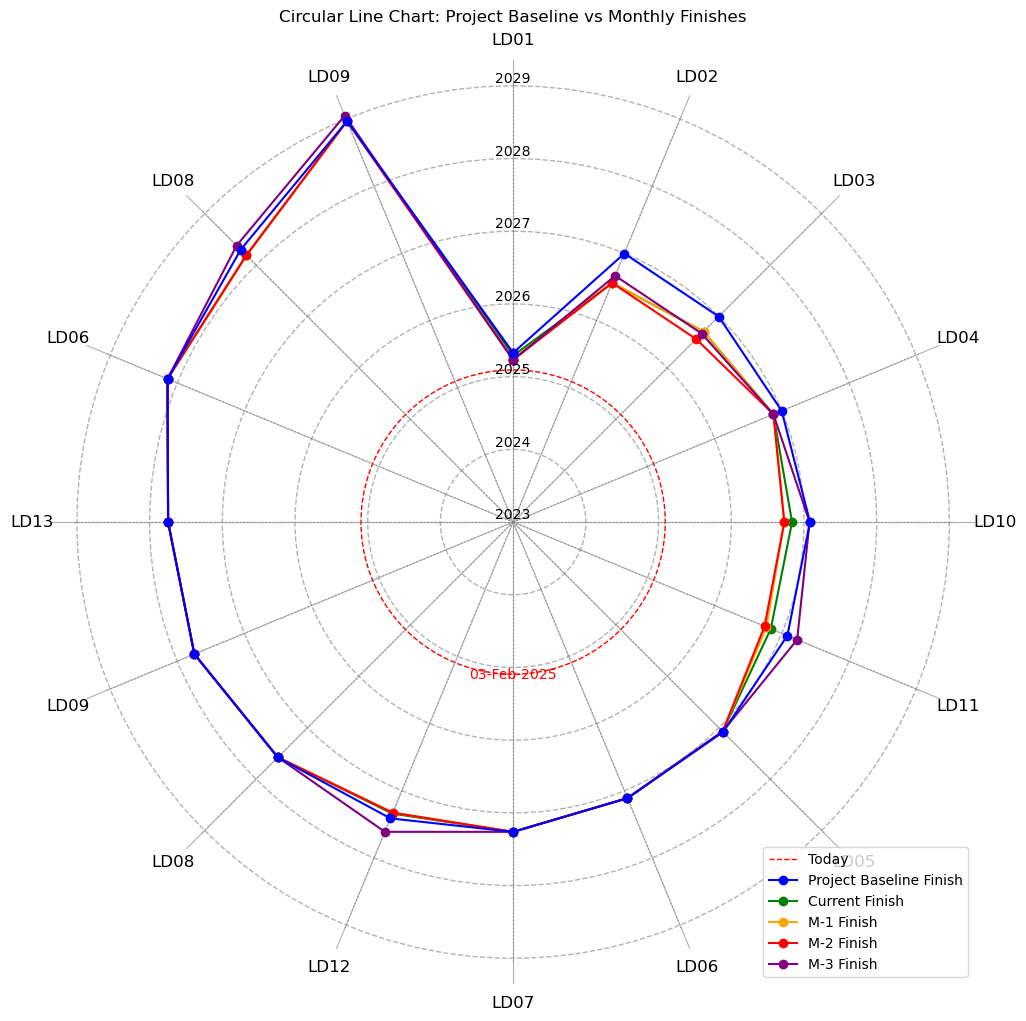

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Excel file
df = pd.read_excel('GPT - Circular Line Chart.xlsx')

# Ensure date columns are in datetime format
date_columns = ['Project Baseline Finish', 'M-1 Finish', 'M-2 Finish', 'M-3 Finish', 'Current Finish']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Sort DataFrame by 'Project Baseline Finish' in ascending order
df = df.sort_values('Project Baseline Finish').reset_index(drop=True)

# Get first part of 'Activity Name' for labels after sorting
activity_labels = df['Activity Name'].str.split(' - ', n=1).str[0].tolist()

# Define reference date (January 1, 2023)
start_date = pd.Timestamp('2023-01-01')

# Normalize dates to radial scale
def normalize_dates(dates, start_date):
    """Converts dates to radial values where January 1, 2023 is radius 0."""
    return [(date - start_date).days / 365.25 for date in dates]

# Normalize each date set
baseline_radial = normalize_dates(df['Project Baseline Finish'], start_date)
current_radial = normalize_dates(df['Current Finish'], start_date)
m1_radial = normalize_dates(df['M-1 Finish'], start_date)
m2_radial = normalize_dates(df['M-2 Finish'], start_date)
m3_radial = normalize_dates(df['M-3 Finish'], start_date)

# Close circle by adding first value at end
baseline_radial.append(baseline_radial[0])
current_radial.append(current_radial[0])
m1_radial.append(m1_radial[0])
m2_radial.append(m2_radial[0])
m3_radial.append(m3_radial[0])

# Calculate angles for circle points
num_points = len(df)
angles = [n / num_points * 2 * np.pi for n in range(num_points)]
angles += angles[:1]  # Close circle

# Set up plot
plt.figure(figsize=(12, 12), dpi=100)
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Add rings for each year
for year in range(2023, 2030):  # Adjust range per your data
    ring_radius = year - 2023  # Adjust so 2024 is radius 1
    ax.plot(np.linspace(0, 2 * np.pi, 100), [ring_radius] * 100, linestyle='--', color='grey', linewidth=1, alpha=0.6)
    if ring_radius >= 0:
        ax.text(0, ring_radius, str(year), ha='center', va='bottom', fontsize=10, color='black')

# Add circle for today
today = pd.Timestamp('today').normalize()
today_radial = normalize_dates([today], start_date)[0]
theta = np.linspace(0, 2 * np.pi, 500)
ax.plot(theta, [today_radial]*len(theta), linestyle='--', color='red', linewidth=1, label='Today')

# Add today's date label at bottom of circle, on second radius
formatted_today = today.strftime('%d-%b-%Y')  # Format 'DD-MMM-YYYY', e.g., '04-Dec-2023'
ax.text(np.pi, 2, formatted_today, ha='center', va='top', fontsize=10, color='red')

# Add dotted radial lines
max_radius = max(max(baseline_radial), max(m1_radial), max(m2_radial), max(m3_radial), max(current_radial), today_radial)
for angle in angles[:-1]:  # Exclude last angle to avoid duplicate
    ax.plot([angle, angle], [0, max_radius], linestyle=':', color='grey', linewidth=1, alpha=0.6)

# Plot each dataset with 'zorder'
ax.plot(angles, baseline_radial, linestyle='-', marker='o', color='blue', label='Project Baseline Finish', zorder=3)
ax.plot(angles, current_radial, linestyle='-', marker='o', color='green', label='Current Finish', zorder=2)
ax.plot(angles, m1_radial, linestyle='-', marker='o', color='orange', label='M-1 Finish', zorder=2)
ax.plot(angles, m2_radial, linestyle='-', marker='o', color='red', label='M-2 Finish', zorder=2)
ax.plot(angles, m3_radial, linestyle='-', marker='o', color='purple', label='M-3 Finish', zorder=2)

# Add activity labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(activity_labels, fontsize=12)

# Improve plot aesthetics
ax.spines['polar'].set_visible(False)
ax.yaxis.set_visible(False)

# Add legend
plt.legend(loc='lower right', fontsize=10)

# Add title
plt.title('Circular Line Chart: Project Baseline vs Monthly Finishes', va='bottom')

# Save plot as transparent PNG
plt.savefig('Circular_Line_Chart.png', format='png', transparent=True)

# Show plot
plt.show()